# Amazon Product Review - Modeling

The purpose of this notebook is to perform some modeling on the dataset that has been manipulated in previous workbooks. I plan to explore several models, including a linear regression, an XGBoost regression model and a random forest regression model. 

In [1]:
#First I'll import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score as cv

In [13]:
#First I need to load the data, and re-build the cluster model then use the cluster model trained on the training data to fit the test data

x_train = pd.read_csv('Data/x_train200k.csv')
y_train = pd.read_csv('Data/y_train200k.csv')
x_test = pd.read_csv('Data/x_test200k.csv')
y_test = pd.read_csv('Data/y_test200k.csv')

In [14]:
x_train.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,5.0,1,"05 22, 2016",AREOC3C9WSI74,B00IOEFBKS,Tom Massart,Love it. So easy to clean and powerful suction...,Handy and powerful,1463875200,"['Home & Kitchen', 'Vacuums & Floor Care', 'Va...",...,0.057973,0.026758,0.006673,0.026023,0.012699,0.004673,-0.001962,0.009144,0.006143,0.005118
1,4.0,1,"10 18, 2016",A11H1ZI85AKHSD,B00MVWGQX0,TaMara,Makes a bold coffee. This coffee maker is of d...,"Beautiful Coffee Maker, Great Bold Cup of Coffee",1476748800,"['Home & Kitchen', 'Kitchen & Dining', 'Coffee...",...,0.010446,0.006419,0.001976,0.007415,0.003369,0.002720,0.000129,0.001336,0.000770,0.000233
2,5.0,1,"12 23, 2011",A2XAINGEZECR9J,B00005UP2N,Linzie,I had been wanting to buy a KitchenAid for a L...,Just Fabulous!,1324598400,"['Home & Kitchen', 'Kitchen & Dining', 'Small ...",...,-0.139195,-0.308115,1.163774,0.681155,0.063220,0.038552,0.003164,0.024894,0.009031,0.004186
3,5.0,1,"12 6, 2014",A26PM5EL75HGL6,B0091YYUAM,Skeeter,Makes cleaning ceramic tile floor so much easi...,Makes cleaning ceramic tile floor so much easi...,1417824000,"['Home & Kitchen', 'Vacuums & Floor Care', 'St...",...,-0.246602,1.193199,0.083695,0.233020,0.049201,0.032810,-0.000243,0.024836,0.008912,0.003937
4,5.0,1,"09 16, 2016",A1PCY719UWTFKU,B00COK3FD8,Jane Newhagen,Why didn't I do this before? I recycled all my...,Why didn't I do this before?,1473984000,"['Home & Kitchen', 'Kitchen & Dining', 'Storag...",...,-0.128938,-0.252325,-0.788620,1.109506,0.068834,0.042716,0.002526,0.027837,0.009225,0.005234


R Squared: 0.0005907643938043439


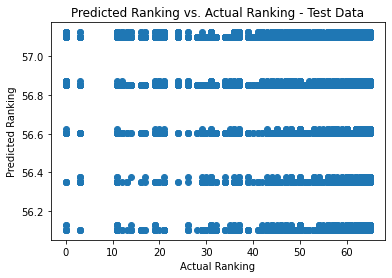

In [58]:
#For my first model I'll try taking a look 
X1_train = x_train[['overall', 'verified']]
X1_test = x_test[['overall', 'verified']]
lm1 = LinearRegression()
lm1.fit(X1_train, y_train)
preds1 = lm1.predict(X1_test)
plt.scatter(y_test, preds1)
R2_1 = r2_score(y_test, preds1)
print('R Squared:', R2_1)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.006584048515115737


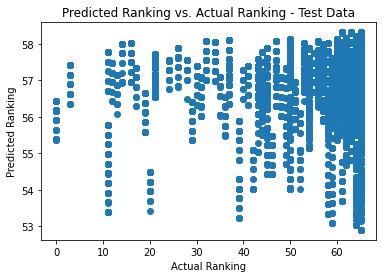

In [59]:
#For my first model I'll try taking a look 
X2_train = x_train[['overall', 'verified', 'price']]
X2_test = x_test[['overall', 'verified', 'price']]
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
lm2 = LinearRegression()
lm2.fit(X2_train, y_train)
preds2 = lm2.predict(X2_test)
plt.scatter(y_test, preds2)
R2_2 = r2_score(y_test, preds2)
print('R Squared:', R2_2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.014792190822673024


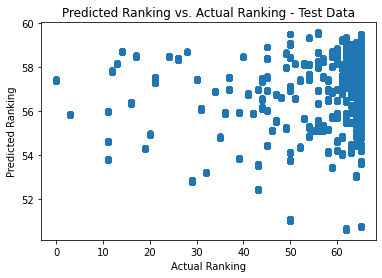

In [60]:
#For my first model I'll try taking a look 
X3_train = x_train[['overall', 'verified', 'price', 'AvgRating']]
X3_test = x_test[['overall', 'verified', 'price', 'AvgRating']]
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)
lm3 = LinearRegression()
lm3.fit(X3_train, y_train)
preds3 = lm3.predict(X3_test)
plt.scatter(y_test, preds3)
R2_3 = r2_score(y_test, preds3)
print('R Squared:', R2_3)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.014942710584127439


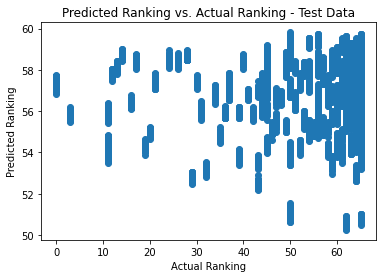

In [61]:
#For my first model I'll try taking a look 
X3_train = x_train[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment']]
X3_test = x_test[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment']]
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)
lm3 = LinearRegression()
lm3.fit(X3_train, y_train)
preds3 = lm3.predict(X3_test)
plt.scatter(y_test, preds3)
R2_3 = r2_score(y_test, preds3)
print('R Squared:', R2_3)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

R Squared: 0.01525696132016241


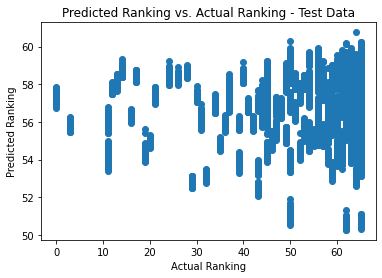

In [62]:
X4_train = x_train[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters']]
X4_test = x_test[['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters']]
scaler = StandardScaler()
scaler.fit(X4_train)
X4_train = scaler.transform(X4_train)
X4_test = scaler.transform(X4_test)
lm4 = LinearRegression()
lm4.fit(X4_train, y_train)
preds4 = lm4.predict(X4_test)
plt.scatter(y_test, preds4)
R2_4 = r2_score(y_test, preds4)
print('R Squared:', R2_4)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

In [21]:
x_train.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'category',
       'title', 'brand', 'rank', 'main_cat', 'price', 'rankCat', 'catRank',
       'Ranking', 'ratingPrice', 'AvgRating', 'RatingCount', 'reviewSentiment',
       'summarySentiment', 'reviewLength', 'clusters', 'clusterXreviewLength',
       'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17',
       'PCA18', 'PCA19', 'PCA20'],
      dtype='object')

It looks like the data may be better predicted by modeling the square root of the sales ranking rather than the ranking. This will solve the issue of the magnitude difference between the best selling and worst selling products as well. 

R Squared: 0.4699493778061481


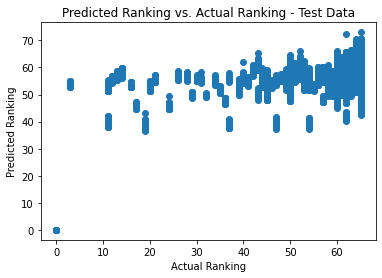

In [63]:
predictors_5 = ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17',
       'PCA18', 'PCA19', 'PCA20']
X5_train = x_train[predictors_5]
X5_test = x_test[predictors_5]
scaler = StandardScaler()
scaler.fit(X5_train)
X5_train = scaler.transform(X5_train)
X5_test = scaler.transform(X5_test)
lm5 = LinearRegression()
lm5.fit(X5_train, np.sqrt(y_train))
preds5 = lm5.predict(X5_test)
plt.scatter(y_test, preds5**2)
R2_5 = r2_score(np.sqrt(y_test), preds5)
print('R Squared:',R2_5)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

Adding the principle components and modeling the square root of the ranking makes a pretty big difference. However, next I'll plan to try out some alternative regression models. First I'll try out the XGBoost regression model. I'll start with the default hyperparameters and include the same features that I used in the previous linear model. 

R Squared: 0.8457698166138589


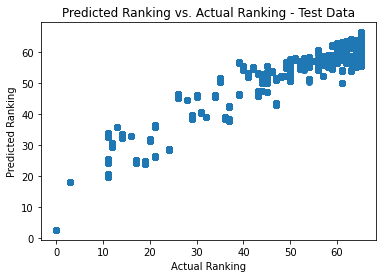

In [65]:
predictors_6 = ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17',
       'PCA18', 'PCA19', 'PCA20']
X6_train = x_train[predictors_6]
X6_test = x_test[predictors_6]
xg6 = XGBRegressor(objective = 'reg:squarederror')
xg6.fit(X6_train, y_train)
preds = xg6.predict(X6_test)
plt.scatter(y_test, preds)
R2 = r2_score(y_test, preds)
print('R Squared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

It looks like the XGBoost regression model is going to perform much better. I'll try tuning the hyperparameters. 

0.8973612908492737


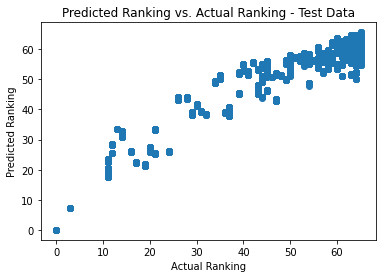

In [66]:
predictors_7= ['overall', 'verified', 'price', 'AvgRating', 'reviewSentiment', 'summarySentiment', 'reviewLength', 'clusters',
                'clusterXreviewLength', 'clusterXprice', 'clusterXavgRating', 'clusterXratingCount', 'PCA0',
       'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17',
       'PCA18', 'PCA19', 'PCA20']
X7_train = x_train[predictors_7]
X7_test = x_test[predictors_7]
xg7 = XGBRegressor(objective = 'reg:squarederror')
xg7.fit(X7_train, np.sqrt(y_train))
preds = xg7.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(np.sqrt(y_test), preds)
print(R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

In [36]:
#I'll plan to use a bayesian optimization algorithm for hyperparater tuning.

dtrain = xgb.DMatrix(data = X7_train, label = np.sqrt(y_train))

def bayes_tune_xgb(max_depth, gamma, n_estimators, learning_rate, subsample):
    params = {'max_depth': int(max_depth),
             'gamma': gamma, 
             'n_esitmators': int(n_estimators),
             'learning_rate': learning_rate,
             'subsample': subsample,
             'eta':0.1,
             'eval_metric': 'rmse', 
             'objective' : 'reg:squarederror'}

    cv_result = xgb.cv(params, dtrain, num_boost_round = 70, nfold = 5)
    return -1*cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(bayes_tune_xgb, {'max_depth': (2, 10),
                                             'gamma': (0,1),
                                             'learning_rate': (0,1),
                                             'n_estimators': (75, 120),
                                             'subsample' : (0.25, 1)
                                             })

xgb_bo.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.01929  |  0.594    |  0.3614   |  7.612    |  106.0    |  0.7753   |
|  2        | -0.01943  |  0.5808   |  0.6212   |  4.146    |  83.51    |  0.9302   |
|  3        | -0.003334 |  0.01859  |  0.8494   |  6.709    |  91.91    |  0.5796   |
|  4        | -0.01939  |  0.5488   |  0.7663   |  4.094    |  118.6    |  0.8572   |
|  5        | -0.02204  |  0.9134   |  0.4254   |  8.453    |  87.74    |  0.7657   |
|  6        | -0.00859  |  0.1481   |  0.4365   |  7.221    |  116.5    |  0.9142   |
|  7        | -0.1528   |  0.1599   |  0.3263   |  3.665    |  113.4    |  0.2815   |
|  8        | -0.005747 |  0.03557  |  0.4322   |  6.996    |  100.9    |  0.9994   |
|  9        | -0.02174  |  0.7231   |  0.4461   |  7.912    |  80.9     |  0.8797   |
|  10       | -0.008358 |  0.1915   |  0.797    |  9.3

In [37]:
#Set the hyperparamters to the best performing parameters. 
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

Rquared: 0.9999999997831475


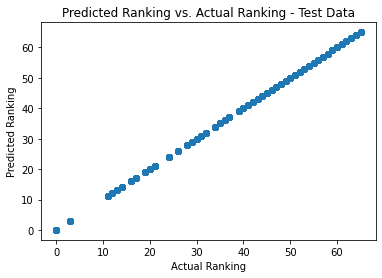

In [67]:
XGBModel = XGBRegressor(**params, objective = 'reg:squarederror')
XGBModel.fit(X7_train, y_train)
preds = XGBModel.predict(X7_test)
plt.scatter(y_test, preds)
R2 = r2_score(y_test, preds)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

0.7261464507766288


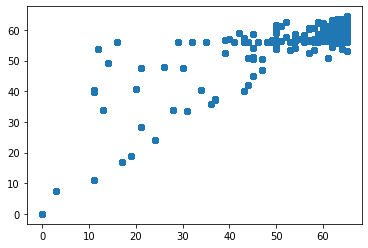

In [47]:
#Now I'll try building a random forest regressor

RF1 = RandomForestRegressor(max_depth = 8)
y_train = np.ravel(y_train)
RF1.fit(X7_train, y_train)
preds = RF1.predict(X7_test)
plt.scatter(y_test, preds)
R2 = r2_score(y_test, preds)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

Just out of curiosity I'll use another bayesian optimization algorithm to tune the hyperparameters for the random forest model

In [44]:
def bayes_tune_RF(max_depth, max_features, n_estimators, max_samples):
    params = {'max_depth': int(max_depth),
             'n_estimators': int(n_estimators),
             'max_features': float(max_features),
             'max_samples': float(max_samples)
             }

    cv_result = cv(RandomForestRegressor(**params), X = X7_train, y = y_train, error_score = 0)
    return np.nanmean(cv_result)

RF_BO = BayesianOptimization(bayes_tune_RF, {'max_depth': (2, 20),
                                             'max_features': (0.5,1),
                                             'n_estimators': (75, 120),
                                             'max_samples' : (0.25, 0.99)
                                             })

RF_BO.maximize(n_iter = 20, init_points = 10, acq = 'ei')

|   iter    |  target   | max_depth | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9985   |  18.9     |  0.8851   |  0.2772   |  102.9    |
|  2        |  0.3958   |  4.101    |  0.7483   |  0.6092   |  75.19    |
|  3        |  0.9871   |  16.25    |  0.5679   |  0.9763   |  83.71    |
|  4        |  0.8538   |  10.64    |  0.8285   |  0.7376   |  109.2    |
|  5        |  0.6374   |  7.737    |  0.5715   |  0.9345   |  101.3    |
|  6        |  0.9988   |  18.14    |  0.9748   |  0.5611   |  87.72    |
|  7        |  0.8341   |  10.23    |  0.6172   |  0.7107   |  84.91    |
|  8        |  0.9851   |  15.94    |  0.828    |  0.9309   |  104.3    |
|  9        |  0.9983   |  18.76    |  0.8381   |  0.5406   |  96.71    |
|  10       |  0.9721   |  14.38    |  0.7718   |  0.7878   |  111.7    |
|  11       |  0.9988   |  20.0     |  0.5      |  0.99     |  110.1    |
|  12       |  0.9999   |  20.0     | 

In [45]:
params = RF_BO.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

Rquared: -14.061286098809436


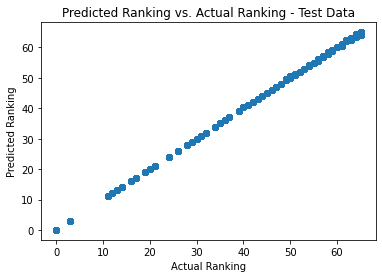

In [68]:
RF1 = RandomForestRegressor(**params)
y_train = np.ravel(y_train)
RF1.fit(X7_train, np.sqrt(y_train))
preds = RF1.predict(X7_test)
plt.scatter(y_test, preds**2)
R2 = r2_score(y_test, preds)
print('Rquared:', R2)
_ = plt.title('Predicted Ranking vs. Actual Ranking - Test Data')
_ = plt.ylabel('Predicted Ranking')
_ = plt.xlabel('Actual Ranking')

While the difference is minimal, the tuned XGBoost model slightly out performs the random forest model and runs much faster, so I'll stick with that model as my final model. 